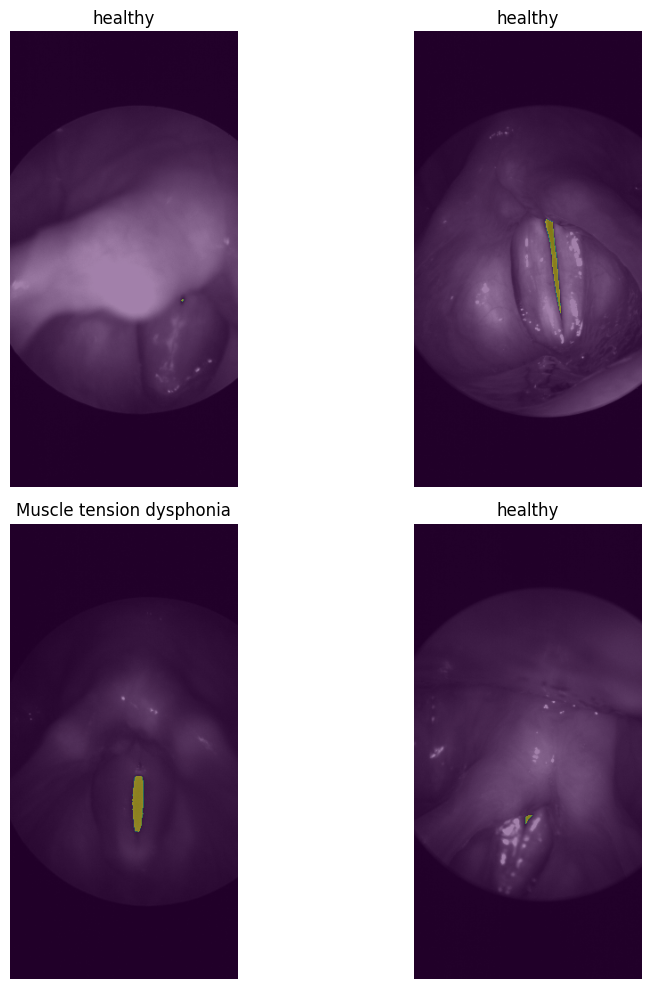

In [ ]:
import json
from PIL import Image
import os
import matplotlib.pyplot as plt

# Path to the dataset folder
dataset_path = "Mini_BAGLS_dataset"

# List for images, segmentation masks, and metadata
images = []
seg_masks = []
metadata = []
titles = []

for i in range(2,6):
    # Load & save image
    image = Image.open(os.path.join(dataset_path, f"{i}.png"))
    images.append(image)
    # Load & save segmentation mask
    seg_mask = Image.open(os.path.join(dataset_path, f"{i}_seg.png"))
    seg_masks.append(seg_mask)

    # Load & save metadata
    metadata_path = os.path.join(dataset_path, f"{i}.meta")
    with open(metadata_path, 'r') as file:
        data = json.load(file)
        titles.append(data["Subject disorder status"])
        metadata.append(data)

# Plot the images with overlays using matplotlib
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Loop through each image, mask, and title to display them
for i, ax in enumerate(axs.flat):
    # Display the image
    ax.imshow(images[i])
    
    # Overlay the segmentation mask with transparency
    ax.imshow(seg_masks[i], alpha=0.5)
    
    # Set the title using the "Subject disorder status"
    ax.set_title(titles[i])
    
    # Remove axes for cleaner visualization
    ax.axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

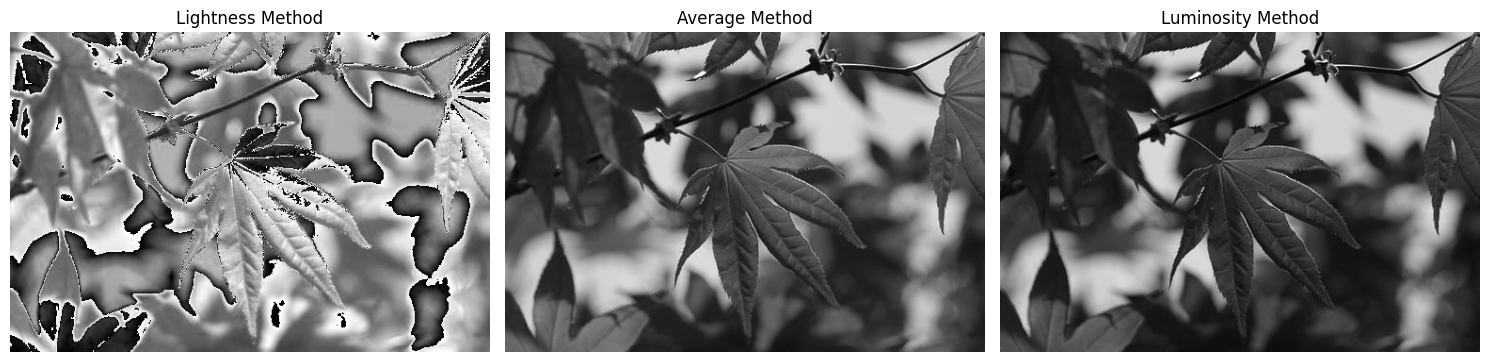

In [10]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Path to the dataset folder and leaves image
leaves_image_path = "leaves.jpg"

# Load the RGB image
leaves_img = Image.open(leaves_image_path)

# Lightness Method: Average of the max and min RGB values
def lightness_method(img):
    img_np = np.array(img)
    lightness = ((img_np.max(axis=2) + img_np.min(axis=2)) / 2).astype(np.uint8)
    return lightness

# Average Method: Average of the RGB values
def average_method(img):
    img_np = np.array(img)
    average = img_np.mean(axis=2).astype(np.uint8)
    return average

# Luminosity Method: Weighted average of the RGB values
def luminosity_method(img):
    img_np = np.array(img)
    luminosity = (0.21 * img_np[:, :, 0] + 0.72 * img_np[:, :, 1] + 0.07 * img_np[:, :, 2]).astype(np.uint8)
    return luminosity

# Convert the image to grayscale using each method
lightness_img = lightness_method(leaves_img)
average_img = average_method(leaves_img)
luminosity_img = luminosity_method(leaves_img)

# Plot the results using matplotlib
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Display the original RGB image
axs[0].imshow(leaves_img)
axs[0].set_title("Original")
axs[0].axis('off')

# Display each grayscale version
axs[0].imshow(lightness_img, cmap='gray')
axs[0].set_title("Lightness Method")
axs[0].axis('off')

axs[1].imshow(average_img, cmap='gray')
axs[1].set_title("Average Method")
axs[1].axis('off')

axs[2].imshow(luminosity_img, cmap='gray')
axs[2].set_title("Luminosity Method")
axs[2].axis('off')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


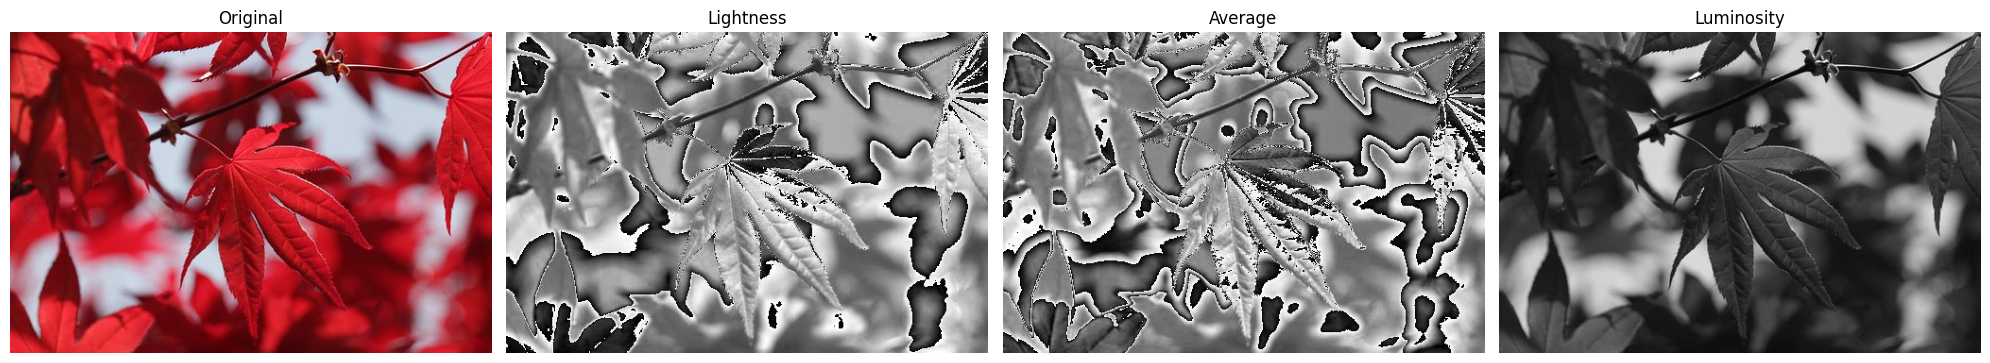

In [7]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Path to the dataset folder and leaves image
leaves_image_path = "leaves.jpg"

# Load the RGB image
leaves_img = Image.open(leaves_image_path)
leaves_img_np = np.array(leaves_img)  # Convert to NumPy array for processing

# Extract the Red, Green, and Blue channels
R = leaves_img_np[:, :, 0]
G = leaves_img_np[:, :, 1]
B = leaves_img_np[:, :, 2]

# Lightness Method: Average of the max and min values of R, G, and B
def lightness_method(R, G, B):
    lightness = ((np.maximum(np.maximum(R, G), B) + np.minimum(np.minimum(R, G), B)) / 2).astype(np.uint8)
    return lightness

# Average Method: Simple average of R, G, and B
def average_method(R, G, B):
    average = ((R + G + B) / 3).astype(np.uint8)
    return average

# Luminosity Method: Weighted average of R, G, and B to better match human perception
def luminosity_method(R, G, B):
    luminosity = (0.21 * R + 0.72 * G + 0.07 * B).astype(np.uint8)
    return luminosity

# Convert the image to grayscale using each method
lightness_img = lightness_method(R, G, B)
average_img = average_method(R, G, B)
luminosity_img = luminosity_method(R, G, B)

# Plot the original image along with each grayscale version
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Display the original RGB image
axs[0].imshow(leaves_img)
axs[0].set_title("Original")
axs[0].axis('off')

# Display the grayscale versions
axs[1].imshow(lightness_img, cmap='gray')
axs[1].set_title("Lightness")
axs[1].axis('off')

axs[2].imshow(average_img, cmap='gray')
axs[2].set_title("Average")
axs[2].axis('off')

axs[3].imshow(luminosity_img, cmap='gray')
axs[3].set_title("Luminosity")
axs[3].axis('off')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


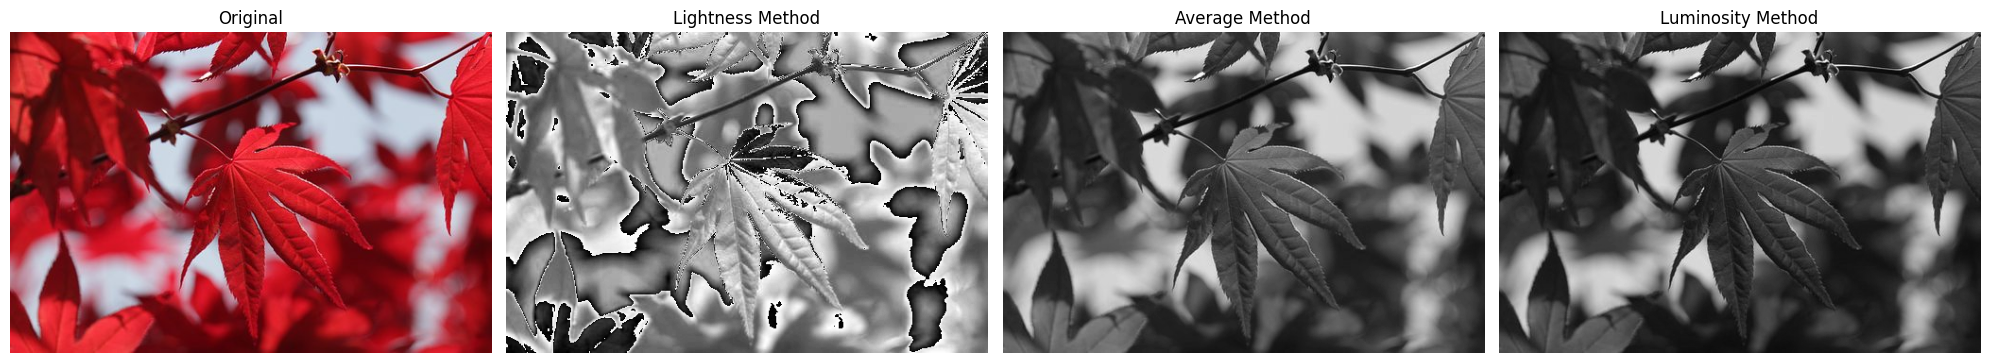

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Path to the dataset folder and leaves image
leaves_image_path = "leaves.jpg"

# Load the RGB image
leaves_img = Image.open(leaves_image_path)
leaves_img_np = np.array(leaves_img)  # Convert to NumPy array for processing

# Lightness Method: Average of the max and min RGB values across the color channels
def lightness_method(img_np):
    lightness = ((img_np.max(axis=2) + img_np.min(axis=2)) / 2).astype(np.uint8)
    return lightness

# Average Method: Simple average of R, G, and B channels
def average_method(R, G, B):
    average = ((R + G + B) / 3).astype(np.uint8)
    return average

# Average Method: Average of the RGB values
def average_method(img):
    img_np = np.array(img)
    average = img_np.mean(axis=2).astype(np.uint8)
    return average

# Luminosity Method: Weighted average of R, G, and B to better match human perception
def luminosity_method(R, G, B):
    luminosity = (0.21 * R + 0.72 * G + 0.07 * B).astype(np.uint8)
    return luminosity

# Extract R, G, and B channels individually
R, G, B = leaves_img_np[:, :, 0], leaves_img_np[:, :, 1], leaves_img_np[:, :, 2]

# Convert the image to grayscale using each method
lightness_img = lightness_method(leaves_img_np)  # Using axis=2 for Lightness Method
average_img = average_method(leaves_img)
luminosity_img = luminosity_method(R, G, B)

# Plot the original image along with each grayscale version
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Display the original RGB image
axs[0].imshow(leaves_img)
axs[0].set_title("Original")
axs[0].axis('off')

# Display the grayscale versions
axs[1].imshow(lightness_img, cmap='gray')
axs[1].set_title("Lightness Method")
axs[1].axis('off')

axs[2].imshow(average_img, cmap='gray')
axs[2].set_title("Average Method")
axs[2].axis('off')

axs[3].imshow(luminosity_img, cmap='gray')
axs[3].set_title("Luminosity Method")
axs[3].axis('off')

# Adjust layout for clarity
plt.tight_layout()
plt.show()
